In [1]:
# 코드 3-29 라이브러리 호출
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# 코드 3-30 상품에 대한 연 지출 데이터(sales data.csv) 호출
data = pd.read_csv("../chap3/data/sales data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# 코드 3-31 연속형 데이터와 명목형 데이터로 분류
categorical_features = ["Channel", "Region"]  # 명목형 데이터
continuous_features = [
    "Fresh",
    "Milk",
    "Grocery",
    "Frozen",
    "Detergents_Paper",
    "Delicassen",
]  # 연속형 데이터

for col in categorical_features:
    dummies = pd.get_dummies(
        data[col], prefix=col
    )  # 명목형 데이터는 판다스의 get_ dummies() 메서드를 사용하여 바이너리로 변환
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [4]:
# 코드 3-32 데이터 전처리(스케일링 적용)
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [5]:
data_transformed

array([[0.11294004, 0.13072723, 0.08146416, ..., 0.        , 0.        ,
        1.        ],
       [0.06289903, 0.13282409, 0.10309667, ..., 0.        , 0.        ,
        1.        ],
       [0.05662161, 0.11918086, 0.08278992, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, ..., 0.        , 0.        ,
        1.        ],
       [0.091727  , 0.02622442, 0.02402535, ..., 0.        , 0.        ,
        1.        ],
       [0.02482434, 0.02237109, 0.02702178, ..., 0.        , 0.        ,
        1.        ]])

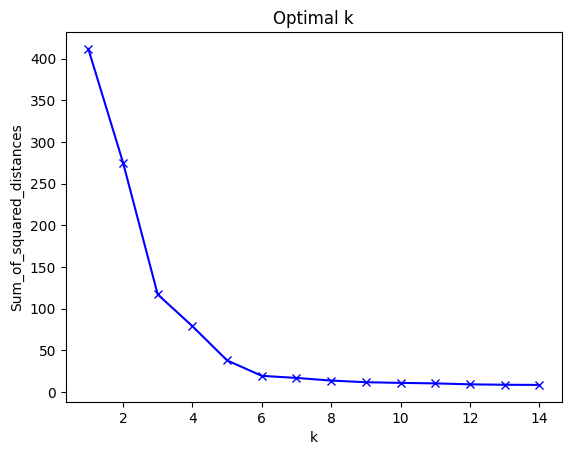

In [6]:
# 코드 3-33 적당한 K 값 추출
Sum_of_squared_distances = []
K = range(1, 15)  # K에 1부터 15까지 적용해 봅니다.
for k in K:
    km = KMeans(n_clusters=k)  # 1~15의 K 값 적용
    km = km.fit(data_transformed)  # KMeans 모델 훈련
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title("Optimal k")
plt.show()